<a href="https://colab.research.google.com/github/katgoodman/kat/blob/main/Capstone_3_Sephora_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Sephora is a French retailer of personal care and beauty products. Customers can leave reviews for products and also place a heart next to a product they want. 

For this project, I wanted to look at customer behavior and what influences ratings and popularity.

Link to dataset origin: https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website/version/1

It was collected by Raghad Adalharbi for their Data Science Immersive Course with General Assembly



#First part: Data Cleaning and Data Checks

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import pandas and read in our GDrive-mounted csv

import pandas as pd

sephora_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/sephora_updated.csv')
sephora_df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,https://www.sephora.com/product/colonia-miniat...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


# Data Wrangling & Checking for Nulls

In [ ]:
sephora_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [ ]:
sephora_df.shape

(9168, 21)

In [ ]:
sephora_df.dtypes

id                          int64
brand                      object
category                   object
name                       object
size                       object
rating                    float64
number_of_reviews           int64
love                        int64
price                     float64
value_price               float64
URL                        object
MarketingFlags               bool
MarketingFlags_content     object
options                    object
details                    object
how_to_use                 object
ingredients                object
online_only                 int64
exclusive                   int64
limited_edition             int64
limited_time_offer          int64
dtype: object

In [ ]:
sephora_df.isnull().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [ ]:
#Filter out columns that are not going to be used 
sephora_df_drop = sephora_df.drop(['id', 'URL', 'details', 'ingredients'], axis=1)
sephora_df_drop.head()

,brand,category,name,size,rating,number_of_reviews,love,price,value_price,MarketingFlags,MarketingFlags_content,options,how_to_use,online_only,exclusive,limited_edition,limited_time_offer
0,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,True,online only,no options,Suggested Usage:-Fragrance is intensified by t...,1,0,0,0
1,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,no instructions,1,0,0,0
2,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,no instructions,1,0,0,0
3,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,no instructions,1,0,0,0
4,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,True,online only,no options,Suggested Usage:-Fragrance is intensified by t...,1,0,0,0


In [ ]:
#Dropping products that have no ratings
sephora_df_new = sephora_df_drop[sephora_df_drop['rating']>0]
sephora_df_new.rating.unique()

array([4. , 4.5, 3.5, 5. , 3. , 2.5, 2. , 1. , 1.5])

In [ ]:
#Explore each category type for products in dataset 
#This showcases which are the most populated type in categories
pd.set_option('display.max_rows', 500)
sephora_df_new.category.value_counts()

Perfume                            656
Moisturizers                       442
Face Serums                        378
Value & Gift Sets                  316
Face Wash & Cleansers              245
Face Masks                         226
Rollerballs & Travel Size          220
Hair Styling Products              213
Eye Palettes                       199
Eye Creams & Treatments            189
Lipstick                           188
Face Brushes                       176
Shampoo                            176
Foundation                         163
Highlighter                        161
Cologne                            154
Mascara                            153
Face Primer                        143
Mini Size                          141
Conditioner                        139
Candles & Home Scents              127
Eyeliner                           123
Setting Spray & Powder             115
Body Lotions & Body Oils           108
Makeup                             108
Beauty Supplements       

# Data Exploration and Visulizations

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("white")

#it is set to ignore warning
import warnings
warnings.filterwarnings("ignore")

Visulization of Price

In [ ]:
#First, let's find the median and max of price for a hypothesis 
sephora_df_new['price'].describe()



count    8770.000000
mean       49.820007
std        46.877433
min         2.000000
25%        24.000000
50%        35.000000
75%        58.000000
max       549.000000
Name: price, dtype: float64

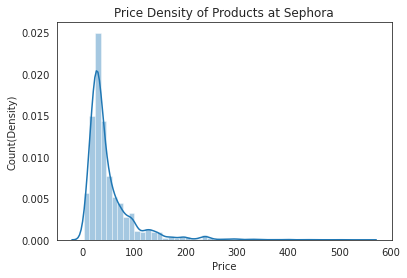

In [ ]:
#Let's look at the density of price 
sns.distplot(x=sephora_df_new['price'], bins=50)
plt.title('Price Density of Products at Sephora')
plt.xlabel('Price')
plt.ylabel('Count(Density)')
plt.show() 

Most of the prices range from 0 - 250. There is a product that is close to 549 USD.

Visulization of *Ratings* and *Loves*

In [ ]:
sephora_df_new['rating'].describe()

count    8770.000000
mean        4.171095
std         0.553349
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

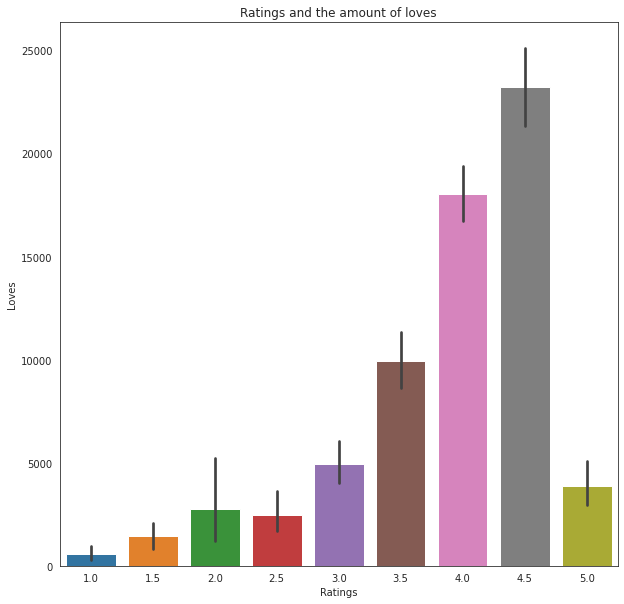

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='rating', y='love', data=sephora_df_new)
plt.title('Ratings and the amount of loves')
plt.xlabel('Ratings')
plt.ylabel('Loves')
plt.show()

From the bar graph, you can see that products that with a rating between 3.5 to 4.5 have a large amount of loves when combined. 

In [ ]:
sephora_df_new['number_of_reviews'].describe()

count     8770.000000
mean       294.877879
std        908.554062
min          1.000000
25%         13.000000
50%         53.000000
75%        224.000000
max      19000.000000
Name: number_of_reviews, dtype: float64

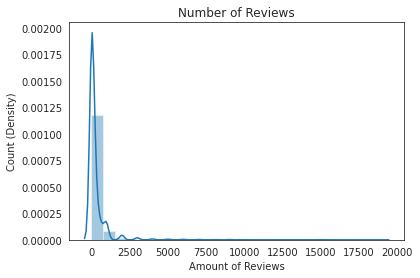

In [ ]:
#Remove review outliers greater than 19000 since most products have a review count of less than 5000
sephora_remove_review_outliers = sephora_df_new[sephora_df_new ['number_of_reviews'] <= 19000]
sns.distplot(x=sephora_remove_review_outliers['number_of_reviews'], bins=25)
plt.title('Number of Reviews')
plt.xlabel('Amount of Reviews')
plt.ylabel('Count (Density)')
plt.show()

#Second Part: Hypothesis Testing

#Hypothesis 1: I hypothesize that there is a correlation between products with higher *ratings* and the amount of *love* received from customers


At Sephora, products are reviewed and receive a rating ranging from 1.0 to 5.0 from customers. Customers can also place a heart next to an item they desire. 

The loved product will be saved in a list for the customer and other customers can see how many loves a product has. 

Do customers rate products higher if they have more love and are popular?

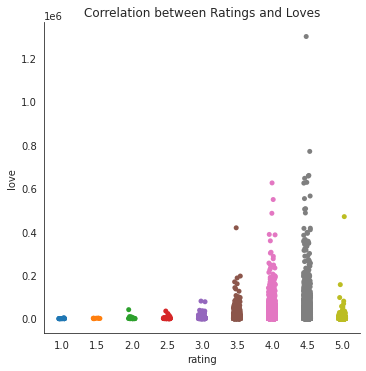

In [ ]:
#The average ratings is situated between 3.5 to 5.0
sns.catplot (x = sephora_df_new["rating"], y = sephora_df_new ["love"], data = sephora_df_new, jitter = True)
plt.title('Correlation between Ratings and Loves')
plt.show()

In [ ]:
from scipy import stats
stats.pearsonr(sephora_df_new['rating'], sephora_df_new['love'])

(0.05454359350811281, 3.204746547757709e-07)

There is a positive and significant coorelation between *rating* and *love*

# Hypothesis 2: I hypothesize that items priced lower than 50 USD are rated higher than items that are priced higher than 50 USD

Sephora sells a variety of products along a varity of price points. When a customer purchases an item, they can leave an honest review and rating of that product. With the current pandemic and a loss of income in households, are customers still purchasing higher end products or leaning towards lower priced products? 

Remember, the mean for price is close to 50 US ($49.50)

In [ ]:
sephora_df_new['price'].describe()

count    8770.000000
mean       49.820007
std        46.877433
min         2.000000
25%        24.000000
50%        35.000000
75%        58.000000
max       549.000000
Name: price, dtype: float64

Seperate products into two seperate dataframes according to price. 

In [ ]:
#We end up with 6084 items that are less than 50 USD
lower_priced_products = sephora_df_new[['price', 'rating']].iloc[(sephora_df_new['price']<50.0).values]
lower_priced_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6084 entries, 40 to 9163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   6084 non-null   float64
 1   rating  6084 non-null   float64
dtypes: float64(2)
memory usage: 142.6 KB


In [ ]:
#There are 2582 products  
higher_priced_products = sephora_df_new[['price', 'rating']].iloc[(sephora_df_new['price']>50.0).values]
higher_priced_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2582 entries, 0 to 9149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2582 non-null   float64
 1   rating  2582 non-null   float64
dtypes: float64(2)
memory usage: 60.5 KB


Visualize lower priced products, higher priced products and their ratings

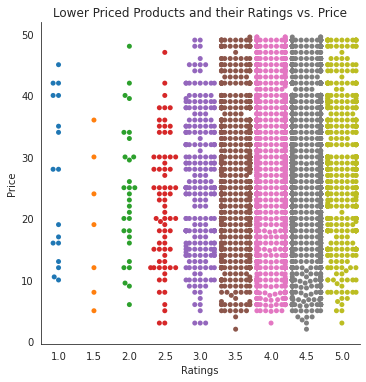

In [ ]:
#Using a Categorical plot, we can see that lower priced products have an average rating between 3.0 to 5.0
sns.catplot(x = lower_priced_products ["rating"], y = lower_priced_products ["price"], kind = "swarm", data = lower_priced_products)
plt.title ('Lower Priced Products and their Ratings vs. Price')
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.show()

In [ ]:
lower_priced_products.rating.value_counts()
#Products (<$50) rated higher than 4.0 total 4,933 out of 6,084 (81%)

4.5    2388
4.0    2059
3.5     791
5.0     486
3.0     235
2.5      71
2.0      30
1.0      17
1.5       7
Name: rating, dtype: int64

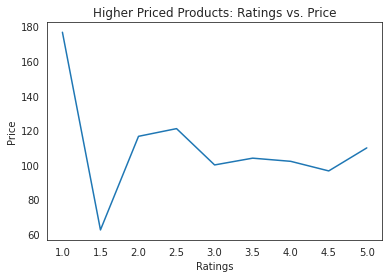

In [ ]:
sns.lineplot(x=higher_priced_products["rating"], y=higher_priced_products["price"], ci= None, data=higher_priced_products)
plt.title ('Higher Priced Products: Ratings vs. Price')
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.show()

In [ ]:
higher_priced_products.rating.value_counts()
#Products (>$50) rated higher than 4.0 total 2,230 out of 2,582 (86%)

4.5    1096
4.0     764
5.0     370
3.5     250
3.0      68
2.5      17
2.0       9
1.0       6
1.5       2
Name: rating, dtype: int64

For each dataframe, a .describe will show the average rating before running a statistical test

In [ ]:
lower_priced_products.rating.describe()
#Lower priced products have an average rating of 4.1

count    6084.000000
mean        4.133876
std         0.556404
min         1.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [ ]:
higher_priced_products.rating.describe()
#Higher priced products have an average rating of 4.2

count    2582.000000
mean        4.255035
std         0.538092
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [ ]:
stats.ttest_ind(lower_priced_products['rating'], higher_priced_products['rating'])

Ttest_indResult(statistic=-9.361772474849795, pvalue=9.82109928933006e-21)

The p-value is less than 0.5 which means there is statistical signifigance between the lower priced products and higher priced products. The original hypothesis is false since the average rating of products over 50USD is 4.2. 

# Hypothesis 3: I hypothesize that there are more *loves* for makeup products for the face versus fragrance products.

On Sephora's website, customers can put a heart next to product they like. These hearts are *loves*. 

As the beauty industry has evolved to include Youtubers and their makeup tutorials, are fragrance products even desired by customers? Are customers desiring more makeup products and brands over fragrance products? 

Face products and fragrance products will be split into two dataframes. Face products excludes lip and eye products. 

In [ ]:
#Each category for products offered 
sephora_df_new.category.unique()

array(['Fragrance', 'Cologne', 'Perfume', 'Body Mist & Hair Mist',
       'Body Lotions & Body Oils', 'Body Sprays & Deodorant',
       'Perfume Gift Sets', 'Rollerballs & Travel Size',
       'Lip Balm & Treatment', 'Lotions & Oils', 'Eye Palettes',
       'Highlighter', 'Cheek Palettes', 'Lipstick', 'Face Serums',
       'Moisturizers', 'Value & Gift Sets', 'Eye Creams & Treatments',
       'Face Sunscreen', 'Lip Balms & Treatments', 'Face Masks',
       'Face Wash & Cleansers', 'Decollete & Neck Creams', 'Face Oils',
       'Hand Cream & Foot Cream', 'Face Primer', 'Color Correct',
       'Mists & Essences', 'Tinted Moisturizer', 'Concealer',
       'Beauty Supplements', 'Facial Peels', 'Mini Size', 'Exfoliators',
       'Conditioner', 'Shampoo', 'Hair Styling Products',
       'Scalp & Hair Treatments', 'Hair Masks', 'Hair Spray', 'Hair Oil',
       'Hair Primers', 'Dry Shampoo', 'Hair', 'Hair Thinning & Hair Loss',
       'Hair Straighteners & Flat Irons', 'Hair Dryers', 'Color Ca

Create a new dataframe for fragrance products which includes:
Fragrance, Cologne, Perfume, Body Mist & Hair Mist, Body Lotions & Body Oils, 
Body Sprays & Deodrants, Perfume Gift Sets, Rollerballs & Travel Size, After Shave, Deodorant & Antiperspirant

In [ ]:
Fragrance_List = ['Fragrance','Cologne', 'Perfume', 'Body Mist & Hair Mist', 'Body Lotions & Body Oils','Body Sprays & Deodrants', 'Perfume Gift Sets', 'Rollerballs & Travel Size', 'After Shave','Deodorant & Antiperspirant']
sephora_fragrance = sephora_df_new[sephora_df_new['category'].isin(Fragrance_List)]
sephora_fragrance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 9159
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand                   1297 non-null   object 
 1   category                1297 non-null   object 
 2   name                    1297 non-null   object 
 3   size                    1297 non-null   object 
 4   rating                  1297 non-null   float64
 5   number_of_reviews       1297 non-null   int64  
 6   love                    1297 non-null   int64  
 7   price                   1297 non-null   float64
 8   value_price             1297 non-null   float64
 9   MarketingFlags          1297 non-null   bool   
 10  MarketingFlags_content  1297 non-null   object 
 11  options                 1297 non-null   object 
 12  how_to_use              1297 non-null   object 
 13  online_only             1297 non-null   int64  
 14  exclusive               1297 non-null   

Create another dataframe for makeup products for the face which includes:
Eye Palettes, Highlighter, Cheek Palettes, Face Primer, Color Correct, Tinted Moisturizer, 
Concealer, BB & CC Cream, Foundation, 
Setting Spray & Powder, Contour, Bronzer, Blush, Makeup, Makeup Palettes

In [ ]:
Face_List = ['Eye Palettes', 'Highlighter', 'Cheek Palettes', 'Face Primer', 'Color Correct', 'Tinted Moisturizer', 'Concealer', 'BB & CC Cream', 'Foundation', 'Setting Spray & Powder', 'Contour', 'Bronzer', 'Blush', 'Makeup', 'Makeup Palettes']
sephora_face = sephora_df_new[sephora_df_new['category'].isin(Face_List)]
sephora_face.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226 entries, 57 to 9156
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand                   1226 non-null   object 
 1   category                1226 non-null   object 
 2   name                    1226 non-null   object 
 3   size                    1226 non-null   object 
 4   rating                  1226 non-null   float64
 5   number_of_reviews       1226 non-null   int64  
 6   love                    1226 non-null   int64  
 7   price                   1226 non-null   float64
 8   value_price             1226 non-null   float64
 9   MarketingFlags          1226 non-null   bool   
 10  MarketingFlags_content  1226 non-null   object 
 11  options                 1226 non-null   object 
 12  how_to_use              1226 non-null   object 
 13  online_only             1226 non-null   int64  
 14  exclusive               1226 non-null  

Explore each new dataframe.

In [ ]:
#There are 1297 fragrance products offered at Sephora 
#The average amount of loves for fragrance products is around 5816
sephora_fragrance['love'].describe()

count      1297.000000
mean       5816.659985
std       11697.808164
min           0.000000
25%        1000.000000
50%        2600.000000
75%        6200.000000
max      193500.000000
Name: love, dtype: float64

In [ ]:
#Face products total 1226 which is 71 less than fragrance 
#The average amount of loves for face products is around 37,246
sephora_face['love'].describe()

count      1226.000000
mean      37246.836868
std       68169.735248
min           0.000000
25%        6000.000000
50%       15500.000000
75%       38800.000000
max      770700.000000
Name: love, dtype: float64

Distribution of loves among fragrance products and their categories

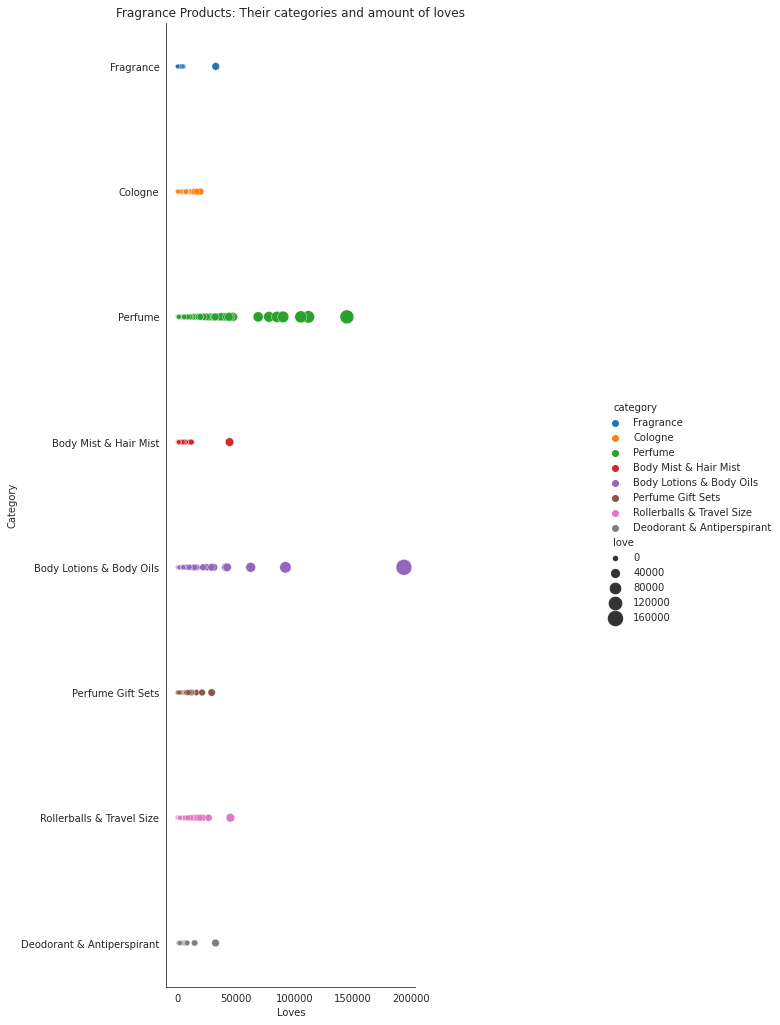

In [ ]:
sns.relplot(x = sephora_fragrance["love"], y = sephora_fragrance["category"], size = sephora_fragrance["love"], sizes=(20,250), hue = sephora_fragrance["category"], data = sephora_fragrance )
plt.title ('Fragrance Products: Their categories and amount of loves')
plt.xlabel('Loves')
plt.ylabel('Category')
plt.gcf().set_size_inches(15, 15)
plt.show()

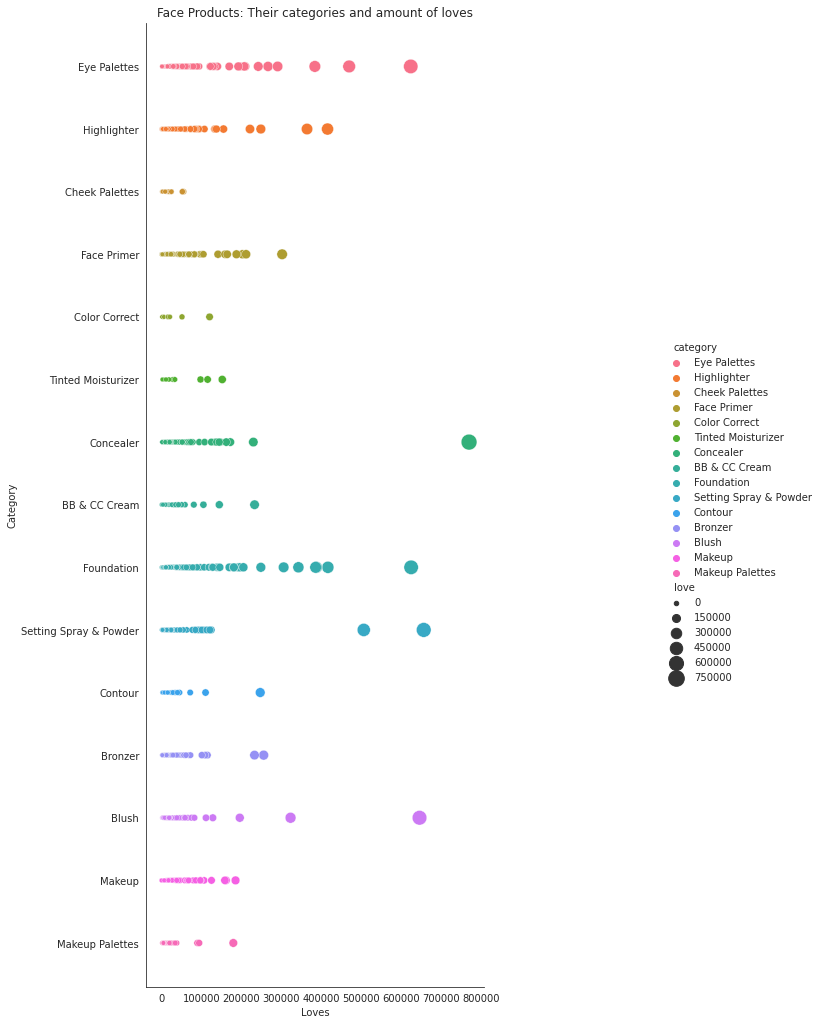

In [ ]:
#Let's look at how amount of loves are distributed among makeup products for the face and their categories
sns.relplot(x = sephora_face["love"], y = sephora_face["category"], size = sephora_face["love"], sizes=(20,250),hue = sephora_face["category"], data = sephora_face)
plt.title ('Face Products: Their categories and amount of loves')
plt.xlabel('Loves')
plt.ylabel('Category')
plt.gcf().set_size_inches(15, 15)
plt.show()

In [ ]:
stats.ttest_ind(sephora_face['love'], sephora_fragrance['love'])

Ttest_indResult(statistic=16.351918644915333, pvalue=3.3420148375868875e-57)

The p-value is less than 0.5 which means there is statistical signifigance between the fragrance products and face products. We can visually see that face products do receive more loves than fragrance products.

#Final Conclusions

Sephora offers a variety of products for customers along with a robust community that allows customers to provide feedback on products. Customers can also show their interest in products through hearts or *loves*.

In conclusion, there is a positive and significant coorelation between products that have a high rating and the amount of loves that have received. 

There is a signficant difference in ratings for items priced higher than 50 USD versus their alternative. Products priced over 50 USD are rated higher which proves my hypothesis wrong. 

However, makeup products for the face are more popular than fragrance products. My initial question is true and it would be interesting to investigate more into the influence of Youtubers. Additionally, looking into removing fragrance products at Sephora could be a next step with more research. 